# Comprensión y Análisis Exploratorio de Datos (EDA)

## 1. Contexto

## 2. Importación de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Carga de datos

In [2]:
DATA_PATH = "../../Base_de_datos.xlsx"
df = pd.read_excel(DATA_PATH)

## 4. Exploración inicial

In [3]:
print("Dimensiones:", df.shape)
df.head()

Dimensiones: (10763, 23)


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [5]:
df.isnull().sum()

tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64

## 5. Caracterización de variables

In [6]:
numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categoricas = df.select_dtypes(include=["object"]).columns.tolist()
fechas = df.select_dtypes(include=["datetime"]).columns.tolist()

In [7]:
print("Numéricas:", numericas)
print("Categóricas:", categoricas)
print("Fechas:", fechas)

Numéricas: ['tipo_credito', 'capital_prestado', 'plazo_meses', 'edad_cliente', 'salario_cliente', 'total_otros_prestamos', 'cuota_pactada', 'puntaje', 'puntaje_datacredito', 'cant_creditosvigentes', 'huella_consulta', 'saldo_mora', 'saldo_total', 'saldo_principal', 'saldo_mora_codeudor', 'creditos_sectorFinanciero', 'creditos_sectorCooperativo', 'creditos_sectorReal', 'promedio_ingresos_datacredito', 'Pago_atiempo']
Categóricas: ['tipo_laboral', 'tendencia_ingresos']
Fechas: ['fecha_prestamo']


Las variables numéricas corresponden principalmente a montos, conteos y puntajes.
Las variables categóricas describen características del cliente.
Se identifica una variable temporal asociada a la fecha del préstamo.
La variable objetivo es Pago_atiempo.

## 6. Análisis univariable

### 6.1 Descripción de numéricas

In [8]:
df[numericas].describe()

,tipo_credito,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.000000,1.076300e+04,10763.000000,10763.000000,1.076300e+04,1.076300e+04,1.076300e+04,10763.000000,10757.000000,10763.000000,10763.000000,10607.000000,1.060700e+04,1.035800e+04,10173.000000,10763.000000,10763.000000,10763.000000,7.833000e+03,10763.000000
mean,5.411131,2.434315e+06,10.575583,43.948620,1.721643e+07,6.238870e+06,2.436174e+05,91.170036,780.790834,5.726749,4.228561,7.746017,4.593741e+04,4.034617e+04,0.260002,2.779987,0.269813,1.302704,2.005157e+06,0.952523
std,2.338279,1.909643e+06,6.632082,15.060877,3.554767e+08,1.184183e+08,2.104937e+05,16.465441,104.878031,3.977162,3.064683,225.955117,1.062698e+05,7.124244e+04,21.772917,2.748807,0.716471,1.824430,2.144116e+06,0.212668
min,4.000000,3.600000e+05,2.000000,19.000000,0.000000e+00,0.000000e+00,2.394400e+04,-38.009990,-7.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,1.224831e+06,6.000000,33.000000,2.000000e+06,5.000000e+05,1.210415e+05,95.227787,757.000000,3.000000,2.000000,0.000000,2.898000e+03,2.690000e+03,0.000000,1.000000,0.000000,0.000000,9.251570e+05,1.000000
50%,4.000000,1.921920e+06,10.000000,42.000000,3.000000e+06,1.000000e+06,1.828630e+05,95.227787,791.000000,5.000000,4.000000,0.000000,1.617800e+04,1.444250e+04,0.000000,2.000000,0.000000,1.000000,1.204496e+06,1.000000
75%,9.000000,3.084840e+06,12.000000,53.000000,4.875808e+06,2.000000e+06,2.878335e+05,95.227787,825.000000,8.000000,6.000000,0.000000,5.298200e+04,4.763225e+04,0.000000,4.000000,0.000000,2.000000,2.231859e+06,1.000000
max,68.000000,4.144415e+07,90.000000,123.000000,2.200000e+10,6.787675e+09,3.816752e+06,95.227787,999.000000,62.000000,29.000000,12534.000000,5.116066e+06,1.562285e+06,2145.000000,51.000000,13.000000,25.000000,3.810658e+07,1.000000


### 6.2 Histogramas numéricos

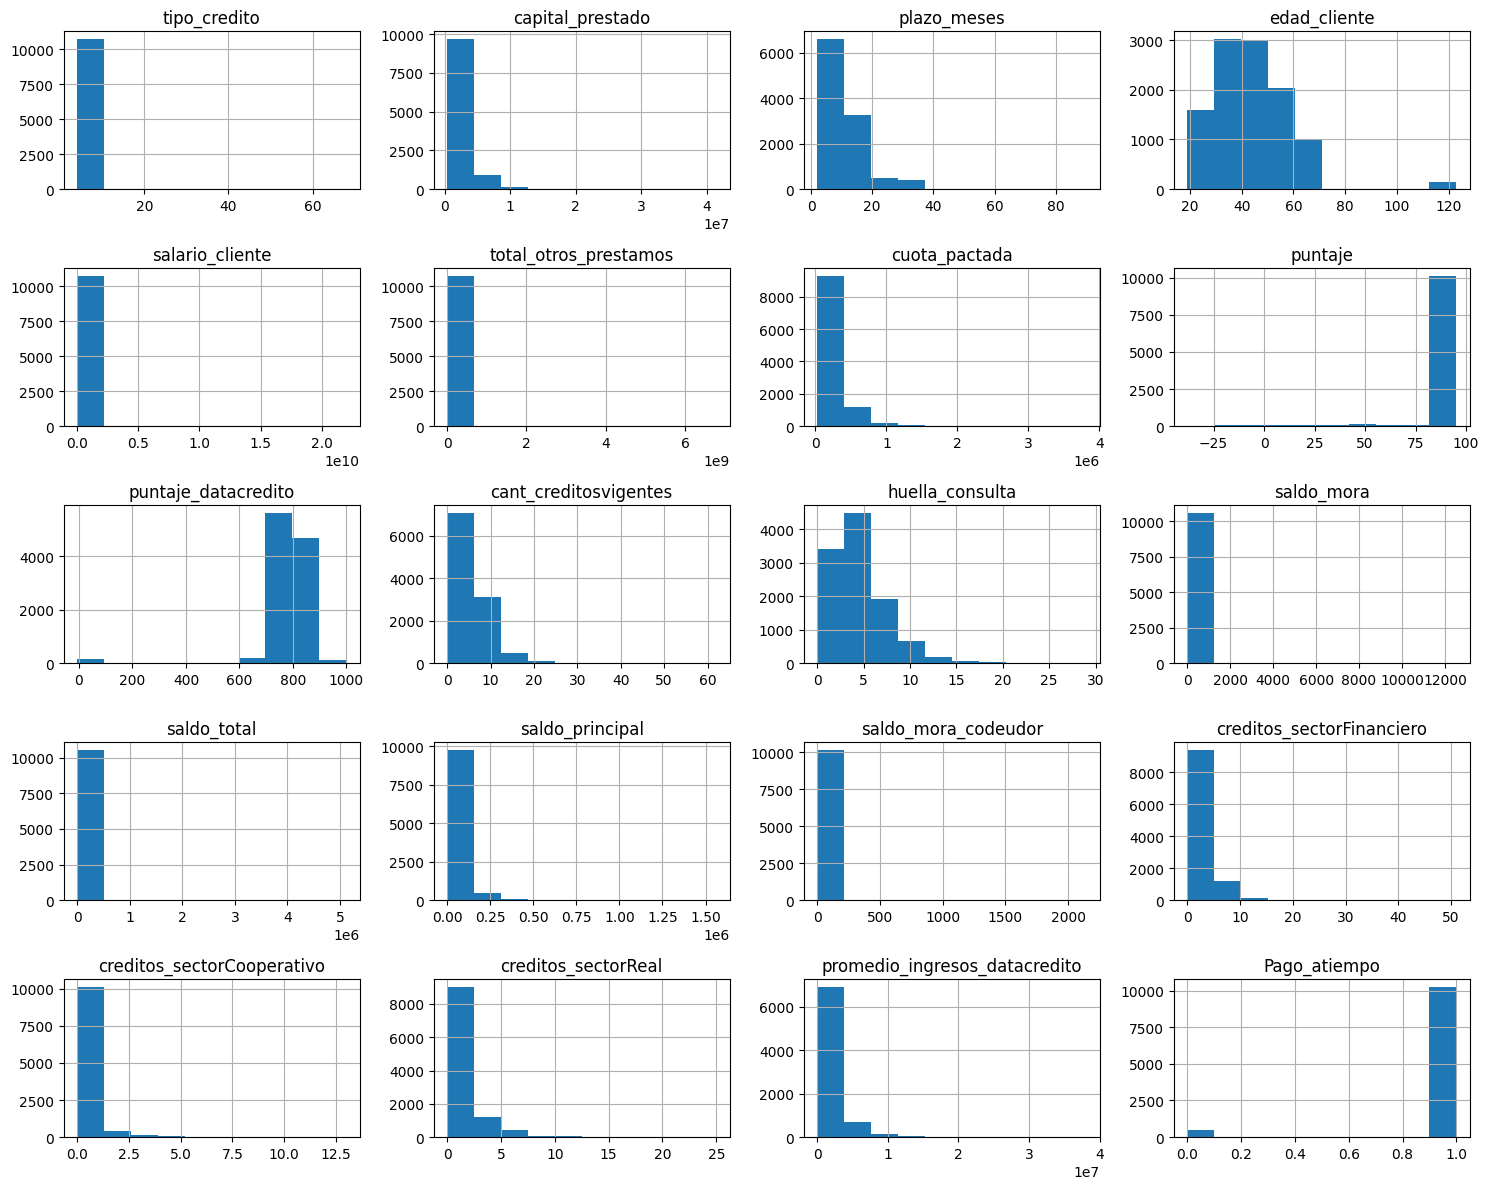

In [9]:
df[numericas].hist(figsize=(15,12))
plt.tight_layout()

### 6.3 Boxplot de algunas variables clave

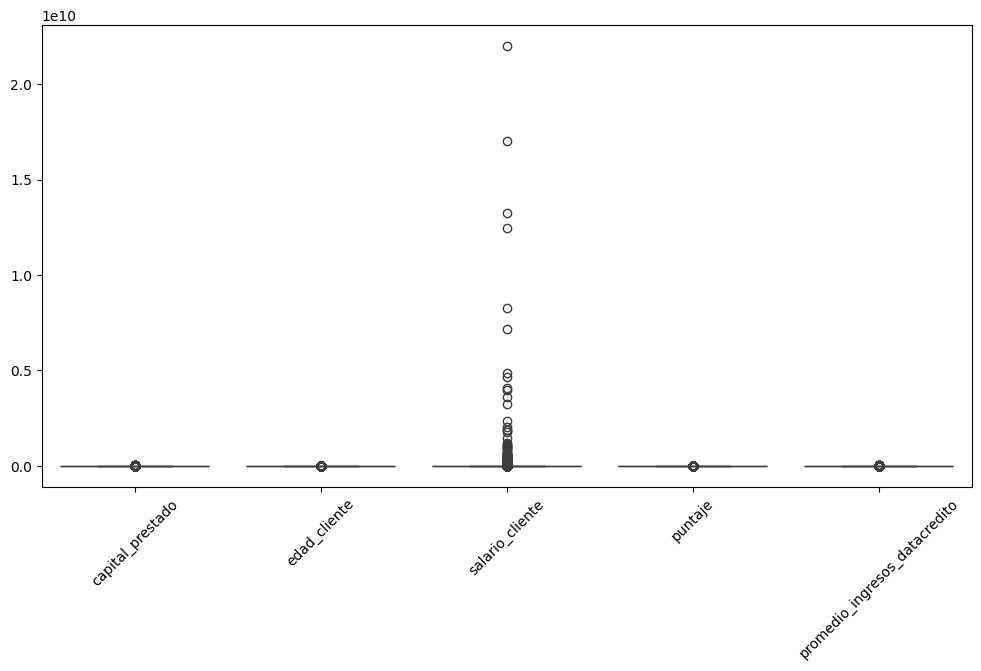

In [10]:
vars_box = [
    "capital_prestado",
    "edad_cliente",
    "salario_cliente",
    "puntaje",
    "promedio_ingresos_datacredito"
]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[vars_box])
plt.xticks(rotation=45)
plt.show()

### 6.4 Variables categóricas

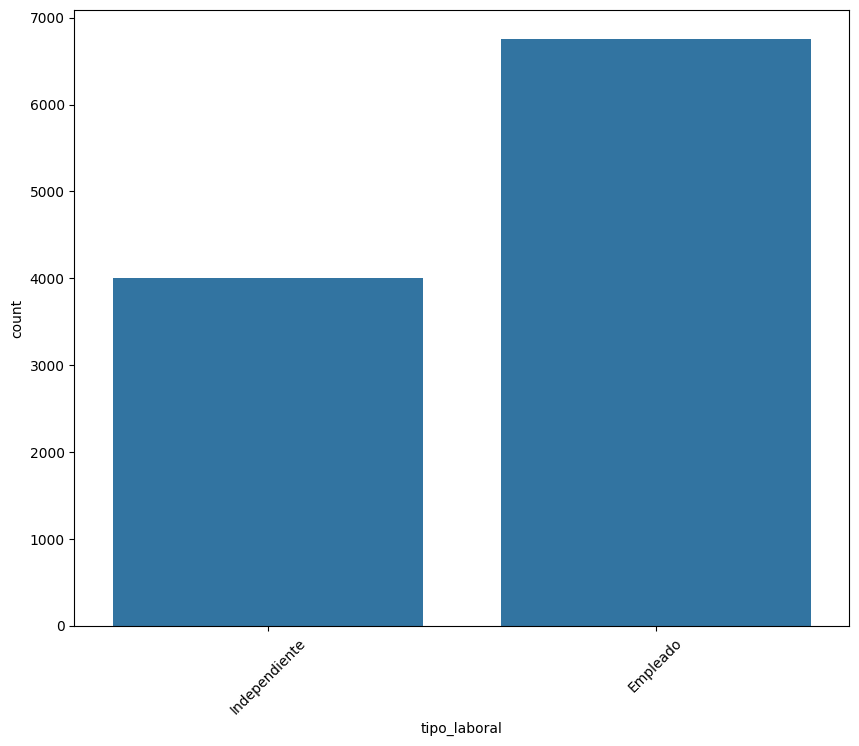

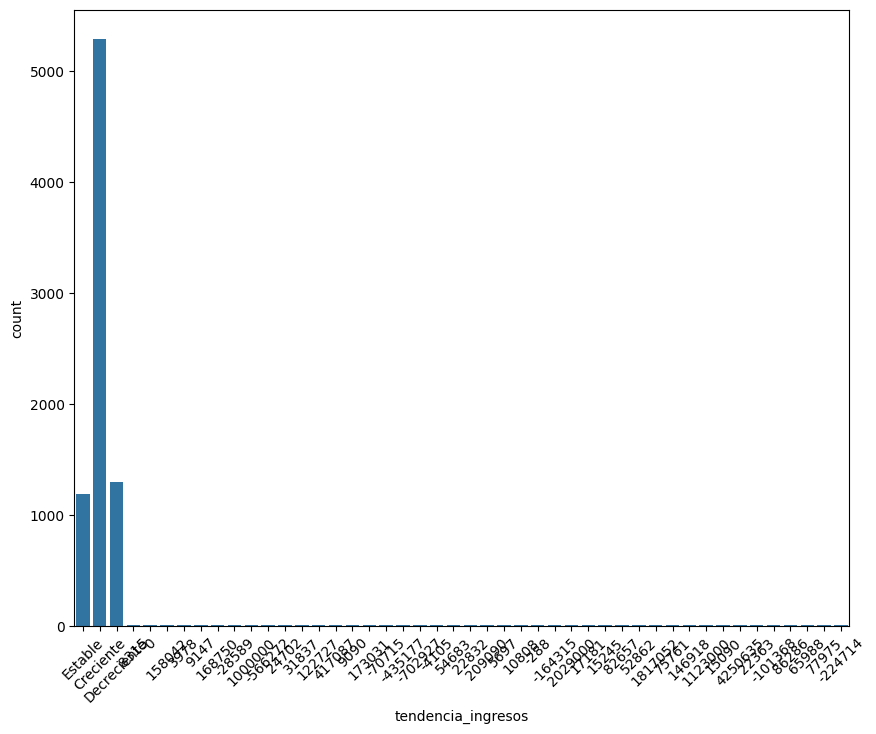

In [17]:
for col in categoricas:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.show()

Se identifica un problema de calidad de datos en la variable tendencia_ingresos, donde coexisten categorías textuales y valores numéricos. Esto sugiere inconsistencias en la fuente de datos y requerirá tratamiento en la etapa de ingeniería de características.

## 7. Análisis bivariable

### 7.1 Distribución del target

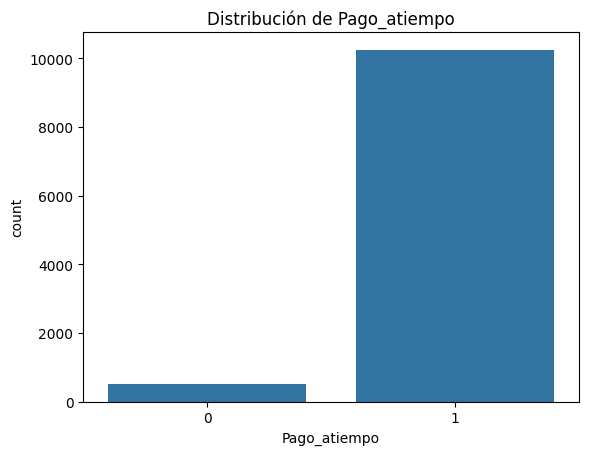

In [18]:
sns.countplot(data=df, x="Pago_atiempo")
plt.title("Distribución de Pago_atiempo")
plt.show()

### 7.2 Numéricas vs target

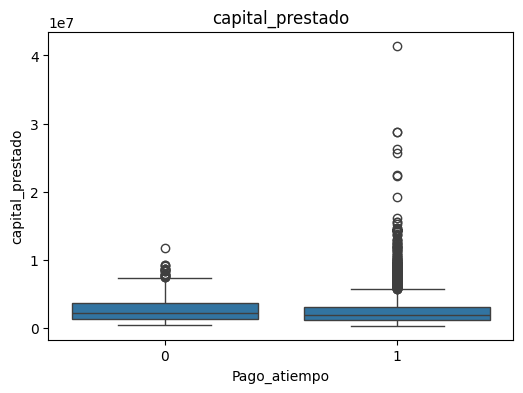

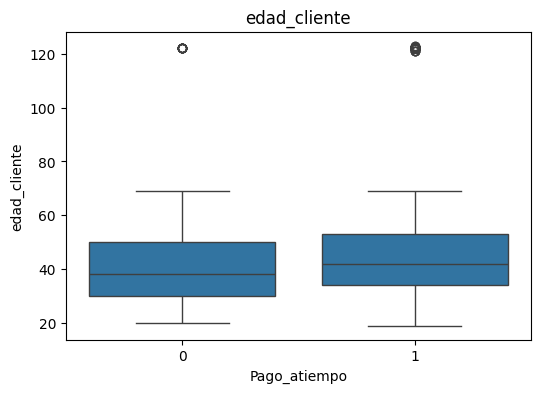

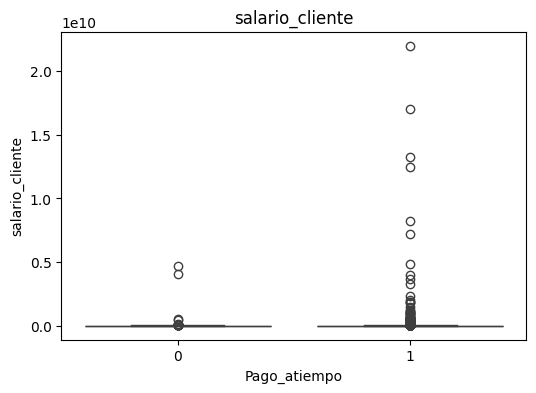

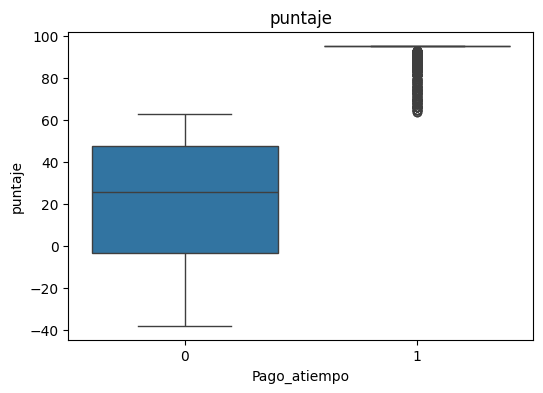

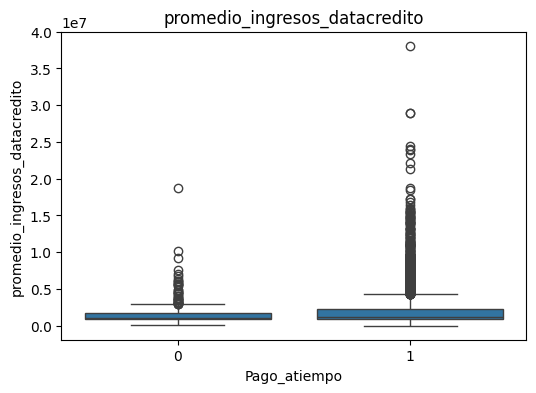

In [19]:
vars_bi = [
    "capital_prestado",
    "edad_cliente",
    "salario_cliente",
    "puntaje",
    "promedio_ingresos_datacredito"
]

for col in vars_bi:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="Pago_atiempo", y=col)
    plt.title(col)
    plt.show()

### 7.3 Categóricas vs target

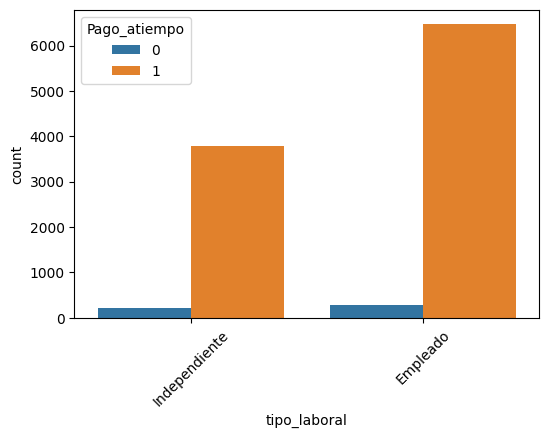

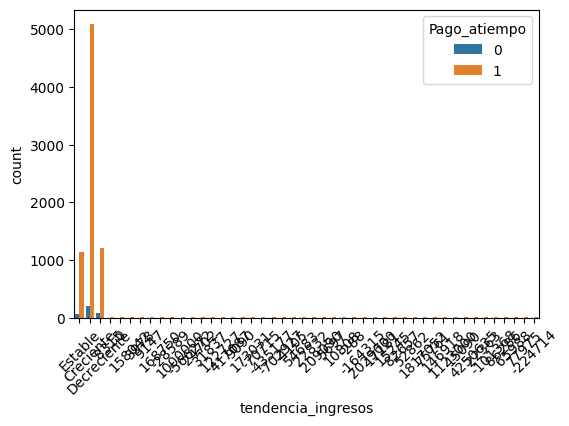

In [20]:
for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Pago_atiempo")
    plt.xticks(rotation=45)
    plt.show()

### 7.4 Histograma de tipos de dato

In [21]:
df["tendencia_ingresos"].apply(type).value_counts()

tendencia_ingresos
<class 'str'>      7773
<class 'float'>    2932
<class 'int'>        58
Name: count, dtype: int64

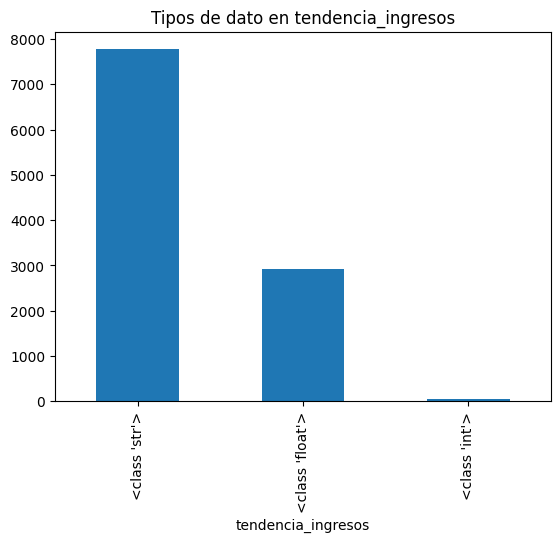

In [22]:
df["tendencia_ingresos"].apply(type).value_counts().plot(kind="bar")
plt.title("Tipos de dato en tendencia_ingresos")
plt.show()

Se observa que la variable tendencia_ingresos presenta una mezcla de tipos de datos:

- Valores tipo string (categorías como Estable, Creciente, Decreciente)
- Valores numéricos (float e int)

Esto confirma una inconsistencia de tipado dentro de una misma variable, lo cual indica un problema de calidad de datos en la fuente original.

La variable será normalizada durante la etapa de Feature Engineering para unificar su representación.

## 8. Análisis multivariable

### 8.1 Matriz de correlación

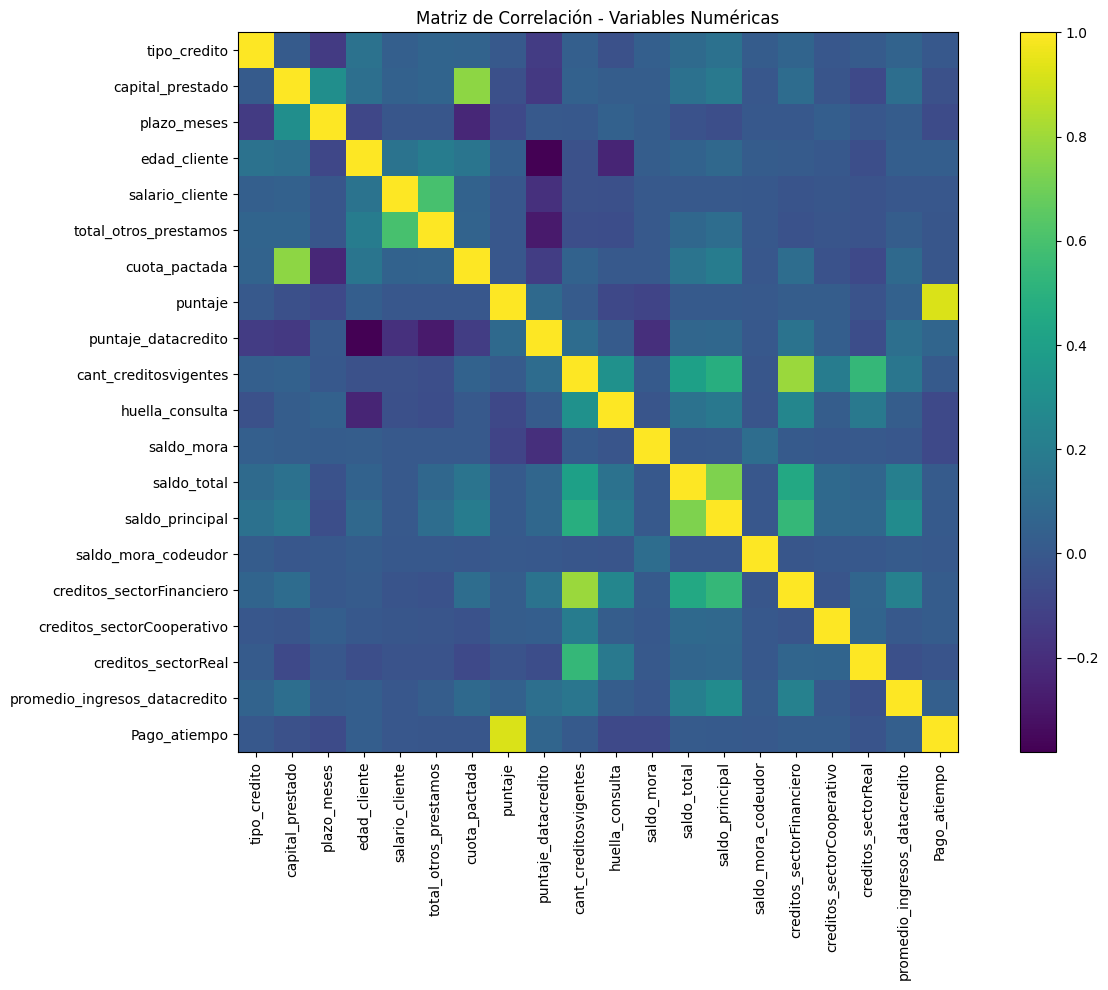

In [23]:
# Selección de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Matriz de correlación
corr_matrix = df[num_cols].corr()

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.imshow(corr_matrix)
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Matriz de Correlación - Variables Numéricas")
plt.tight_layout()
plt.show()

### Matriz de correlación (variables numéricas)

- Se observan correlaciones altas entre:
  - `saldo_total` y `saldo_principal`
  - `saldo_principal` y `saldo_mora`

- Correlaciones moderadas:
  - `capital_prestado` con `cuota_pactada`
  - `cant_creditosvigentes` con créditos por sector

- `Pago_atiempo` no presenta correlaciones fuertes individuales.

**Interpretación:**  
El comportamiento de pago depende de combinaciones de variables más que de una sola variable aislada.  
Existen grupos de variables redundantes (saldos) a evaluar en etapas posteriores.

### 8.2 Relación conjunta de variables numéricas

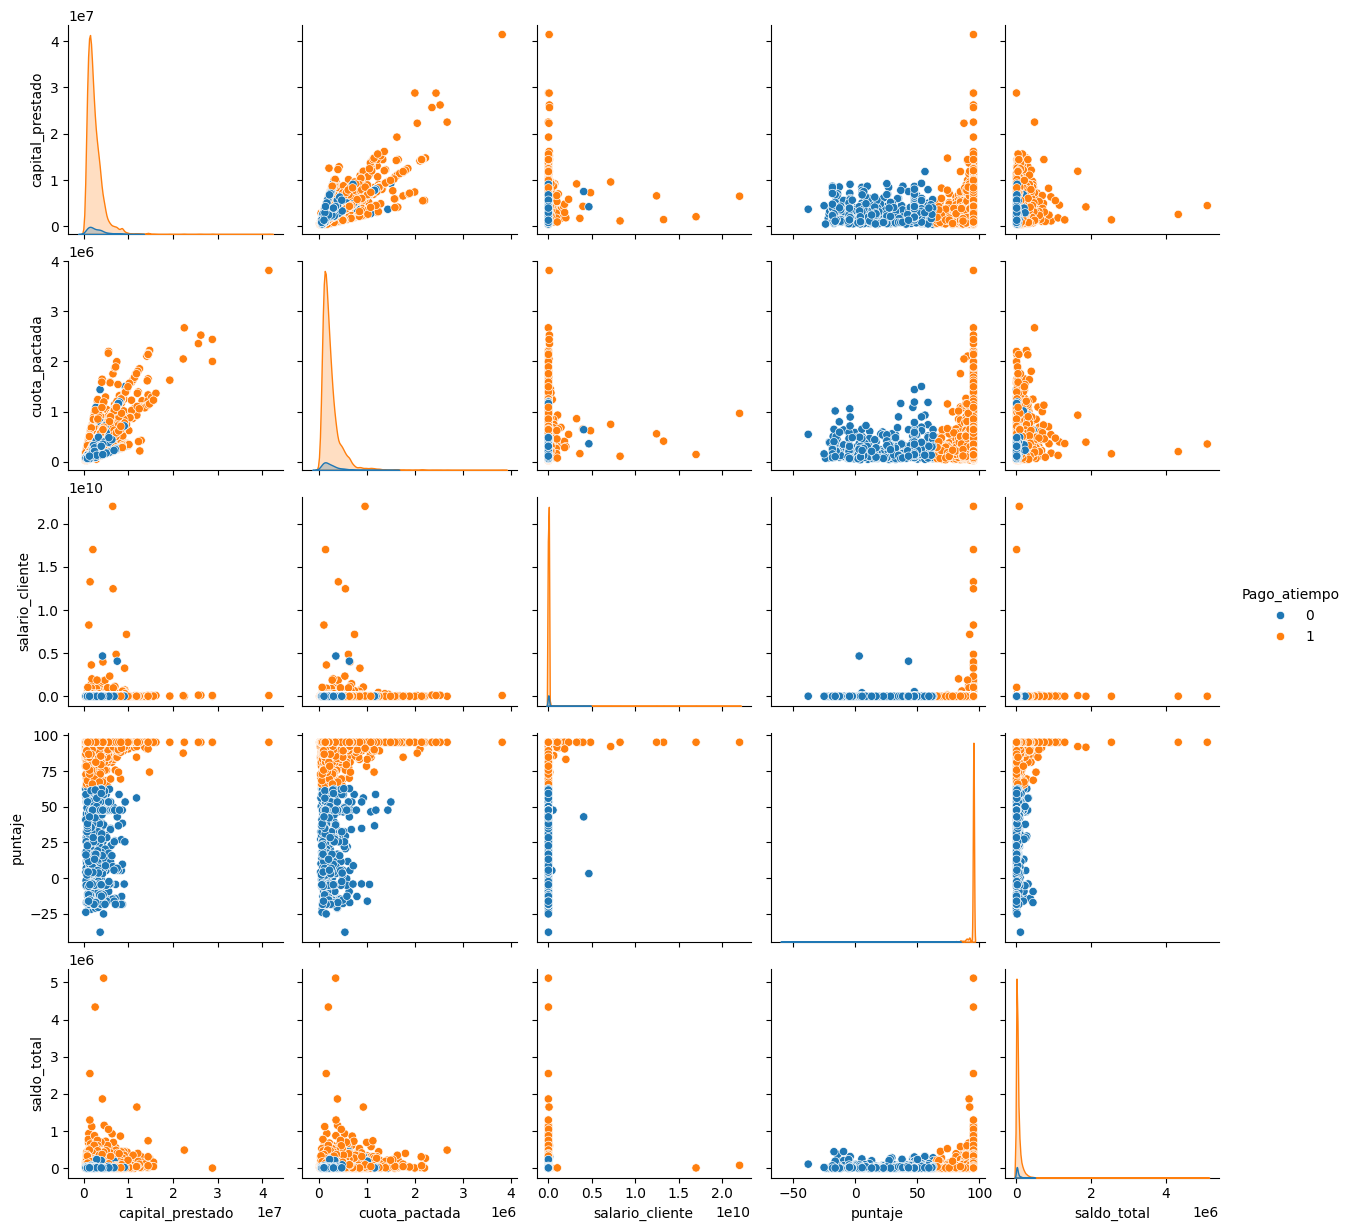

In [24]:
cols_pairplot = [
    "capital_prestado",
    "cuota_pactada",
    "salario_cliente",
    "puntaje",
    "saldo_total",
    "Pago_atiempo"
]

sns.pairplot(df[cols_pairplot], hue="Pago_atiempo")
plt.show()

En el pairplot se observan patrones relevantes tanto en las distribuciones individuales como en las relaciones entre variables numéricas y su asociación con la variable objetivo (Pago_atiempo).

**Distribuciones (diagonal):**
- *capital_prestado*: distribución sesgada a la derecha, con predominio de montos bajos y presencia de algunos préstamos elevados.
- *cuota_pactada*: comportamiento similar al capital prestado, con menor dispersión, consistente con su relación directa.
- *salario_cliente*: distribución concentrada, con pocos valores extremos; los pagos a tiempo predominan en rangos medios y altos.
- *puntaje*: concentración en rangos definidos; los pagos a tiempo se asocian mayormente a puntajes altos.
- *saldo_total*: alta dispersión y colas largas; los pagos tardíos aparecen con mayor frecuencia en valores elevados.

**Relaciones bivariadas:**
- *capital_prestado vs cuota_pactada*: fuerte correlación lineal positiva.
- *capital_prestado vs salario_cliente*: alta dispersión, sin relación lineal clara; mayor proporción de pagos a tiempo en salarios más altos.
- *capital_prestado vs puntaje*: ligera tendencia negativa; montos mayores tienden a asociarse con puntajes menores.
- *cuota_pactada vs puntaje*: cierta separación entre clases; pagos a tiempo más frecuentes en cuotas bajas y puntajes altos.
- *salario_cliente vs puntaje*: correlación positiva leve.
- *saldo_total vs resto de variables*: alta dispersión; pagos tardíos predominan cuando el saldo es elevado.

Estos patrones sugieren que variables financieras y de comportamiento crediticio presentan relaciones útiles para la predicción del pago a tiempo.

### 8.3 Variables categóricas y su interacción con el target

In [25]:
# Tablas de proporción normalizadas
pd.crosstab(df['tipo_laboral'], df['Pago_atiempo'], normalize='index')

Pago_atiempo,0,1
tipo_laboral,,
Empleado,0.042938,0.957062
Independiente,0.055126,0.944874


In [26]:
pd.crosstab(df['tendencia_ingresos'], df['Pago_atiempo'], normalize='index')

Pago_atiempo,0,1
tendencia_ingresos,,
-702927,0.000000,1.000000
-566272,0.000000,1.000000
-435177,0.000000,1.000000
-224714,0.000000,1.000000
-164315,0.000000,1.000000
-101368,0.000000,1.000000
-70715,0.000000,1.000000
-28589,0.000000,1.000000
-4105,0.000000,1.000000


Se analizaron tablas de proporciones entre las variables categóricas y la variable objetivo `Pago_atiempo`.

#### **Tipo laboral vs Pago_atiempo**

Los empleados presentan una mayor proporción de pagos a tiempo (95.7%) en comparación con los independientes (94.5%).  
Aunque la diferencia es moderada, sugiere que la estabilidad laboral está asociada a un menor riesgo de incumplimiento.

Esta variable podría aportar información útil al modelo.

#### **Tendencia de ingresos vs Pago_atiempo**

Las categorías semánticas muestran diferencias claras:

- Tendencia creciente: 96.1% de pagos a tiempo  
- Tendencia estable: 95.4% de pagos a tiempo  
- Tendencia decreciente: 93.7% de pagos a tiempo  

Se observa que clientes con ingresos crecientes presentan mejor comportamiento de pago, mientras que ingresos decrecientes se asocian a mayor riesgo.

Por otro lado, aparecen múltiples valores numéricos aislados que también figuran como categorías, lo que indica problemas de tipificación de datos.  
Esta variable requerirá un proceso de estandarización y recodificación en etapas posteriores.

### 8.4 Conclusiones del análisis multivariable

Las variables financieras como capital prestado, cuota pactada, saldo total y puntaje presentan relaciones consistentes con el comportamiento de pago.

Se observa una asociación entre mayores puntajes, menores saldos y mayor probabilidad de pago a tiempo.

Las variables laborales y de tendencia de ingresos también aportan información relevante, mostrando diferencias en las tasas de cumplimiento.

En conjunto, el análisis multivariable confirma que el comportamiento de pago está determinado por una combinación de factores financieros, demográficos y laborales, lo cual justifica el uso de modelos multivariados para su predicción.

## 9. Conclusiones generales del análisis exploratorio (EDA)

El dataset cuenta con más de diez mil registros y veintitrés variables, combinando información demográfica, laboral, financiera e histórica del comportamiento crediticio.

Durante la exploración se identificaron valores nulos principalmente en variables asociadas a saldos y comportamiento en centrales de riesgo.

Las variables numéricas muestran distribuciones mayormente asimétricas, con presencia de colas largas en montos financieros, lo que sugiere la posible aplicación futura de transformaciones como escalamiento o normalización.

El análisis univariable evidenció que variables como puntaje, salario, capital prestado, cuota pactada y saldos poseen rangos amplios y alta variabilidad, indicando un fuerte poder descriptivo.

En el análisis bivariable se observaron relaciones relevantes entre la variable objetivo `Pago_atiempo` y variables como puntaje, cuota pactada, saldo total y salario, donde mejores condiciones financieras se asocian con mayor probabilidad de pago.

El análisis multivariable confirmó que el comportamiento de pago no depende de una sola variable, sino de la combinación de factores financieros, laborales y de historial crediticio.

Se detectaron además oportunidades de mejora en calidad de datos, particularmente en la variable `tendencia_ingresos`, que requiere estandarización.

Como resultado de este EDA, el dataset se considera adecuado para avanzar a la fase de ingeniería de características y modelado, contando con un conjunto de variables relevantes y con sentido de negocio para la predicción del incumplimiento.